In [119]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Structuur code

### OOP

In [120]:
class Foto: # use Foto object as composition in other classes
    def __init__(self, path):
        self.path = path
    def convertto_array(self):
        image = Image.open(self.path).convert("RGB")
        print(f'{self.path} will be transformed to numpy array.')
        return np.array(image)

In [121]:
class BaseCreation:
    def __init__(self, inst_foto : Foto ):
        self.np_image = inst_foto.convertto_array()
    def make_matrix(self, rows, columns):
        matrix = np.tile(self.np_image, (rows,columns , 1))  # The 1 means that the number of channels (e.g., RGB) remains unchanged.
        plt.figure(figsize=(5,10))
        plt.imshow(matrix)
        # plt.axis('off')
        plt.show()
    def make_oef2(self, columns):
        vflip = self.np_image[:, ::-1, :]
        hflip = self.np_image[::-1, :, :]
        vhflip = self.np_image[::-1, ::-1, :]
        basis= np.concatenate((self.np_image, vflip, hflip, vhflip), axis = 0)
        oef2 = np.tile(basis, (1, columns, 1 ))
        plt.figure(figsize=(4, 20))
        plt.imshow(oef2)
    def make_oef3(self, factor:int ):  # factor is het aantal rode kolommen, factor has to be an even number !!!!
        try:
            if factor%2!=0 or factor<2:
                raise ValueError(f'choose an even number, higher or equal to 2, instead of {factor}')
            else:
                rood = self.np_image.copy()
                rood[:,:, [1,2] ]=0
                groen= self.np_image.copy()
                groen[:,:, [0,2]]=0
                blauw = self.np_image.copy()
                blauw[:,:, [0,1]]=0
                # figuur vergroten (dubbel = factor4/2)
                hstretch = np.repeat(self.np_image, int(factor-2) , axis= 1)  # heigt stays constant
                vstretch = np.repeat(hstretch, int(factor-2) , axis = 0)
                row_a = np.tile(rood, (1, factor , 1 ))
                row_c = np.tile(blauw , (1, factor, 1))
                im_b = np.tile(groen , (int(factor-2) , 1, 1) )
                row_b = np.concatenate((im_b, vstretch, im_b) , axis = 1)
                oef3 = np.concatenate((row_a, row_b, row_c) , axis= 0)
                plt.figure(figsize= (5,10))
                plt.imshow(oef3)
        except ValueError as ve:
            print(ve)

toekan.jpg will be transformed to numpy array.


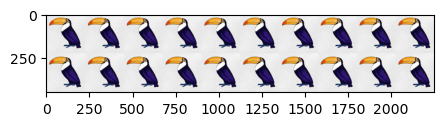

Belgium_lion.png will be transformed to numpy array.


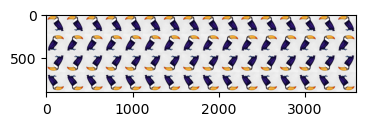

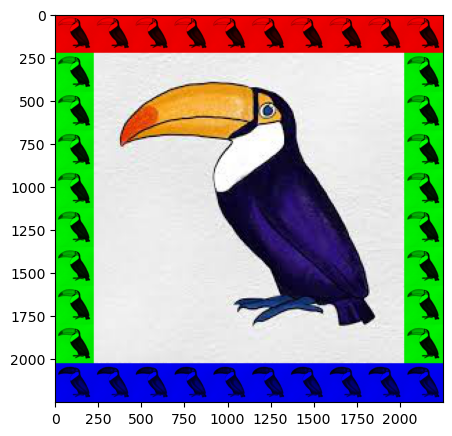

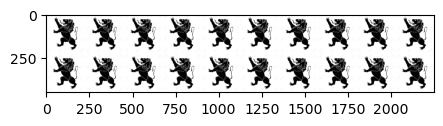

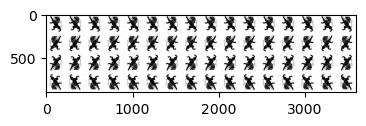

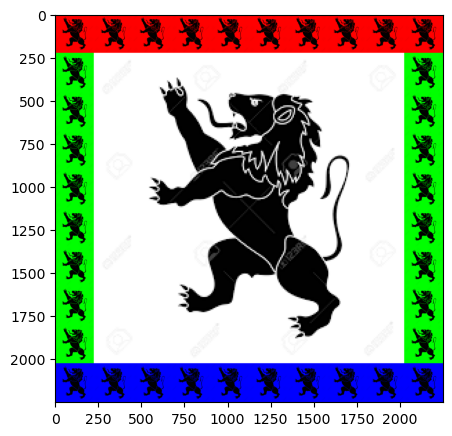

In [122]:
path1 = 'toekan.jpg'
foto1=Foto(path1)
creation1= BaseCreation(foto1)
creation1.make_matrix(2,10)
creation1.make_oef2(16)
creation1.make_oef3(10)

path2 = 'Belgium_lion.png'
foto2=Foto(path2)
creation2= BaseCreation(foto2)
creation2.make_matrix(2,10)
creation2.make_oef2(16)
creation2.make_oef3(10)

In [123]:
class LionImage(BaseCreation):

    ALLOWED_LION_FILENAME = "Belgium_lion.png"
    
    def __init__(self, inst_foto: Foto):
        super().__init__(inst_foto)
        self.is_lion = inst_foto.path
        self.black_mask = (self.np_image[:, :, 0] < 100) & (self.np_image[:, :, 1] < 100) & (self.np_image[:, :, 2] < 100)

    @property
    def is_lion(self):
        return self._is_lion

    @is_lion.setter
    def is_lion(self, file_path):
        if not file_path.endswith(self.ALLOWED_LION_FILENAME):
            raise ValueError(f"Invalid image! Only '{self.ALLOWED_LION_FILENAME}' is allowed.")
        self._is_lion = True  # Only set to True if validation passes

    def create_red_lion(self):
        red_lion = self.np_image.copy()
        red_lion[self.black_mask] = [255, 0, 0]
        plt.figure(figsize= (12,4))
        plt.imshow(red_lion)
        plt.axis("off")
        return red_lion
    
    def create_blue_lion(self):
        blue_lion = self.np_image.copy()
        blue_lion[self.black_mask] = [0, 0, 255]
        plt.figure(figsize= (12,4))
        plt.imshow(blue_lion)
        plt.axis("off")
        return blue_lion

    def create_green_lion(self):
        green_lion = self.np_image.copy()
        green_lion[self.black_mask] = [0, 255, 0]
        plt.figure(figsize= (12,4))
        plt.imshow(green_lion)
        plt.axis("off")
        return green_lion

    def show_all_colored_lions(self):
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        axes[0].imshow(red_lion)
        axes[0].set_title("Red Lion")
        axes[0].axis("off")

        axes[1].imshow(blue_lion)
        axes[1].set_title("Blue Lion")
        axes[1].axis("off")

        axes[2].imshow(green_lion)
        axes[2].set_title("Green Lion")
        axes[2].axis("off")

        plt.show()


Belgium_lion.png will be transformed to numpy array.


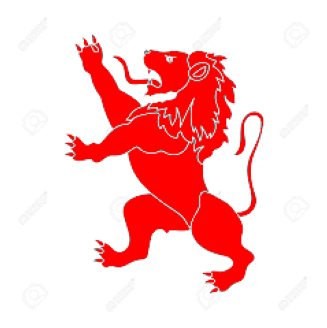

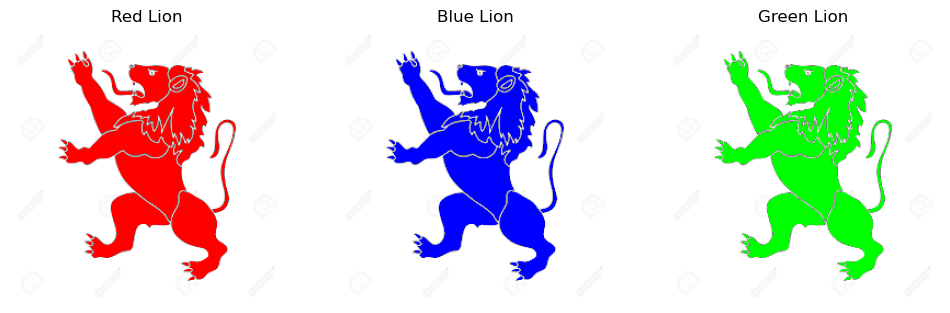

toekan.jpg will be transformed to numpy array.


ValueError: Invalid image! Only 'Belgium_lion.png' is allowed.

In [124]:
lioncreation2 = LionImage(foto2)
lioncreation2.create_red_lion()
lioncreation2.show_all_colored_lions()

lioncreation1 = LionImage(foto1)
lioncreation1.create_red_lion()



In [125]:
class BelgianFlagWithLion:
    def __init__(self, inst_foto=None, flag_height=600, flag_width=900, default_image_path="Belgium_lion.png"):
        """Initialize with image path and flag dimensions."""
        if inst_foto is None:
            inst_foto = Foto(default_image_path) 
            self.is_default_image = True 
        else:
            self.is_default_image = False 
        self.np_image = inst_foto.convertto_array()
        self.flag_height = flag_height
        self.flag_width = flag_width
        self.flag_created = False

        if self.is_default_image:
    
            self.black_mask = (self.np_image[:, :, 0] < 100) & (self.np_image[:, :, 1] < 100) & (self.np_image[:, :, 2] < 100)
   
    def create_belgian_flag(self):
        """Create a Belgian flag with 3 stripes."""
        # Creating flag with 3 stripes
        stripe_width = self.flag_width // 3

        # Creating base flag array
        self.flag = np.zeros((self.flag_height, self.flag_width, 3), dtype=np.uint8)

        # First black stripe
        self.flag[:, 0:stripe_width] = [0, 0, 0]

        # Middle stripe (yellow)
        self.flag[:, stripe_width:2*stripe_width] = [255, 255, 0]

        # Last stripe (red)
        self.flag[:, 2*stripe_width:] = [255, 0, 0]

        self.flag_created = True

        return self.flag

    def add_image_to_flag(self, x_offset=0, y_offset=0):
        """Add an image (like the lion) to the flag at a given position."""

        if not self.flag_created:
            raise ValueError("Flag must be created first using create_belgian_flag before adding images.")
 
        # Get the image location on the flag
        coordinate_y = y_offset + (self.flag_height - self.np_image.shape[0]) // 2
        coordinate_x = x_offset + (self.flag_width - self.np_image.shape[1]) // 2

        if self.is_default_image:

            self.flag[coordinate_y:coordinate_y + self.np_image.shape[0], coordinate_x:coordinate_x + self.np_image.shape[1]][self.black_mask] = [0, 0, 0]
        else:
  
            self.flag[coordinate_y:coordinate_y + self.np_image.shape[0], coordinate_x:coordinate_x + self.np_image.shape[1]] = self.np_image
            
    def display_flag(self):
        """Display the flag with any images added."""
        if self.flag is not None:
            plt.figure(figsize=(10, 6))
            plt.imshow(self.flag)
            plt.axis('off')
            plt.title('Belgian Flag with Added Image')
            plt.show()
        else:
            print("Flag has not been created yet. Please create the flag first.")



Belgium_lion.png will be transformed to numpy array.


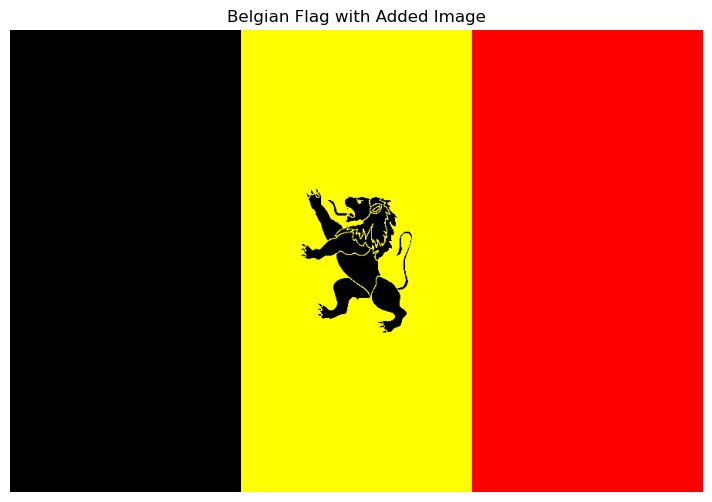

toekan.jpg will be transformed to numpy array.


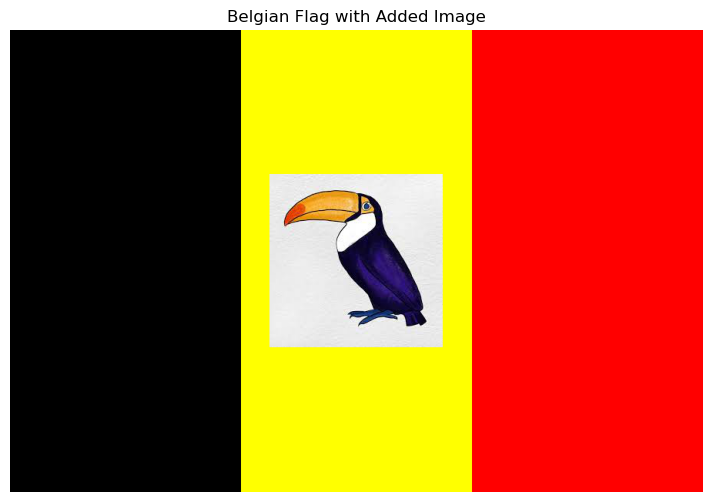

In [126]:
# Example Usage:
try:
    flag_with_lion = BelgianFlagWithLion()
    flag_with_lion.create_belgian_flag()  # Create the flag
    flag_with_lion.add_image_to_flag()  # Add the lion image
    flag_with_lion.display_flag()  # Display the flag

    flag_with_toekan = BelgianFlagWithLion(foto1)
    flag_with_toekan.create_belgian_flag()
    flag_with_toekan.add_image_to_flag()
    flag_with_toekan.display_flag()
except Exception as e:
    print(f"Error: {e}")

In [113]:
class SpecialEffectsCreation:
    @staticmethod
    def apply_gradient(image):
        """Apply a gradient between two colors."""


        height, width, _ = image.shape 
        
        gradient = image.copy()

        orange_gradient = np.linspace(0, 255, width).astype(np.uint8)
        orange_gradient = np.tile(orange_gradient, (height, 1))

        gradient[:, :, 0] = np.maximum(gradient[:, :, 0], orange_gradient)
        gradient[:, :, 1] = np.maximum(gradient[:, :, 1], (orange_gradient * 0.6))  

    @staticmethod
    def sine_distortion(image, amplitude=20, frequency=0.05):
    
        height, width, channels = image.shape
    
        x_coords = np.tile(np.arange(width), (height, 1))  
        y_coords = np.tile(np.arange(height), (width, 1)).T  
    
        transformed_x = x_coords + amplitude * np.sin(2 * np.pi * frequency * y_coords)
        transformed_x = np.clip(transformed_x.astype(int), 0, width - 1)
        
        distorted_image = np.zeros_like(image)
    
        for channel in range(channels):
            distorted_image[:, :, channel] = image[y_coords, transformed_x, channel]
    
        return distorted_image.astype(np.uint8)





## Special functions

### Gradient function

In [127]:
def gradient(image):
    """Applies an orange gradient over the entire image."""
    
    height, width, channels = image.shape
    gradient = image.copy()

    orange_gradient = np.linspace(0, 255, width).astype(np.uint8)
    orange_gradient = np.tile(orange_gradient, (height, 1))

    gradient[:, :, 0] = np.maximum(gradient[:, :, 0], orange_gradient)
    gradient[:, :, 1] = np.maximum(gradient[:, :, 1], (orange_gradient * 0.6))  

    return gradient


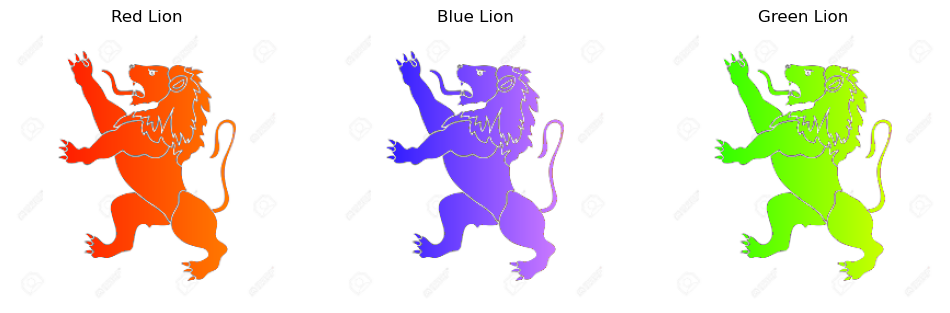

In [128]:
gradient_image_red = gradient(red_lion)
gradient_image_blue = gradient(blue_lion)
gradient_image_green = gradient(green_lion)

#plt.imshow(gradient_image)
#plt.axis("off")
#plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(gradient_image_red)
axes[0].set_title("Red Lion")
axes[0].axis("off")

axes[1].imshow(gradient_image_blue)
axes[1].set_title("Blue Lion")
axes[1].axis("off")

axes[2].imshow(gradient_image_green)
axes[2].set_title("Green Lion")
axes[2].axis("off")

plt.show()

### Sine wave distortion

In [129]:
def sine_distortion(image, amplitude=20, frequency=0.05):
    
    height, width, channels = image.shape

    x_coords = np.tile(np.arange(width), (height, 1))
    y_coords = np.tile(np.arange(height), (width, 1)).T 

    transformed_x = x_coords + amplitude * np.sin(2 * np.pi * frequency * y_coords)
    transformed_x = np.clip(transformed_x.astype(int), 0, width - 1)
    
    distorted_image = np.zeros_like(image)

    for channel in range(channels):
        distorted_image[:, :, channel] = image[y_coords, transformed_x, channel]

    return distorted_image.astype(np.uint8)

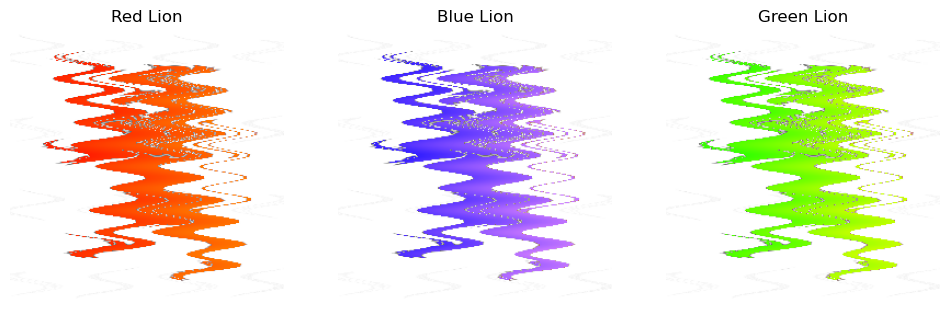

In [118]:
distorted_image_red = sine_distortion(gradient_image_red)
distorted_image_blue = sine_distortion(gradient_image_blue)
distorted_image_green = sine_distortion(gradient_image_green)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(distorted_image_red)
axes[0].set_title("Red Lion")
axes[0].axis("off")

axes[1].imshow(distorted_image_blue)
axes[1].set_title("Blue Lion")
axes[1].axis("off")

axes[2].imshow(distorted_image_green)
axes[2].set_title("Green Lion")
axes[2].axis("off")

plt.show()
